<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/ARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from matplotlib import pyplot
from arch import arch_model
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)

In [17]:
data1.head()

,CBBTCUSD
DATE,
2017-06-18,2515.25
2017-06-19,2596.98
2017-06-20,2725.08
2017-06-21,2643.35
2017-06-22,2679.99


<Axes: xlabel='DATE'>

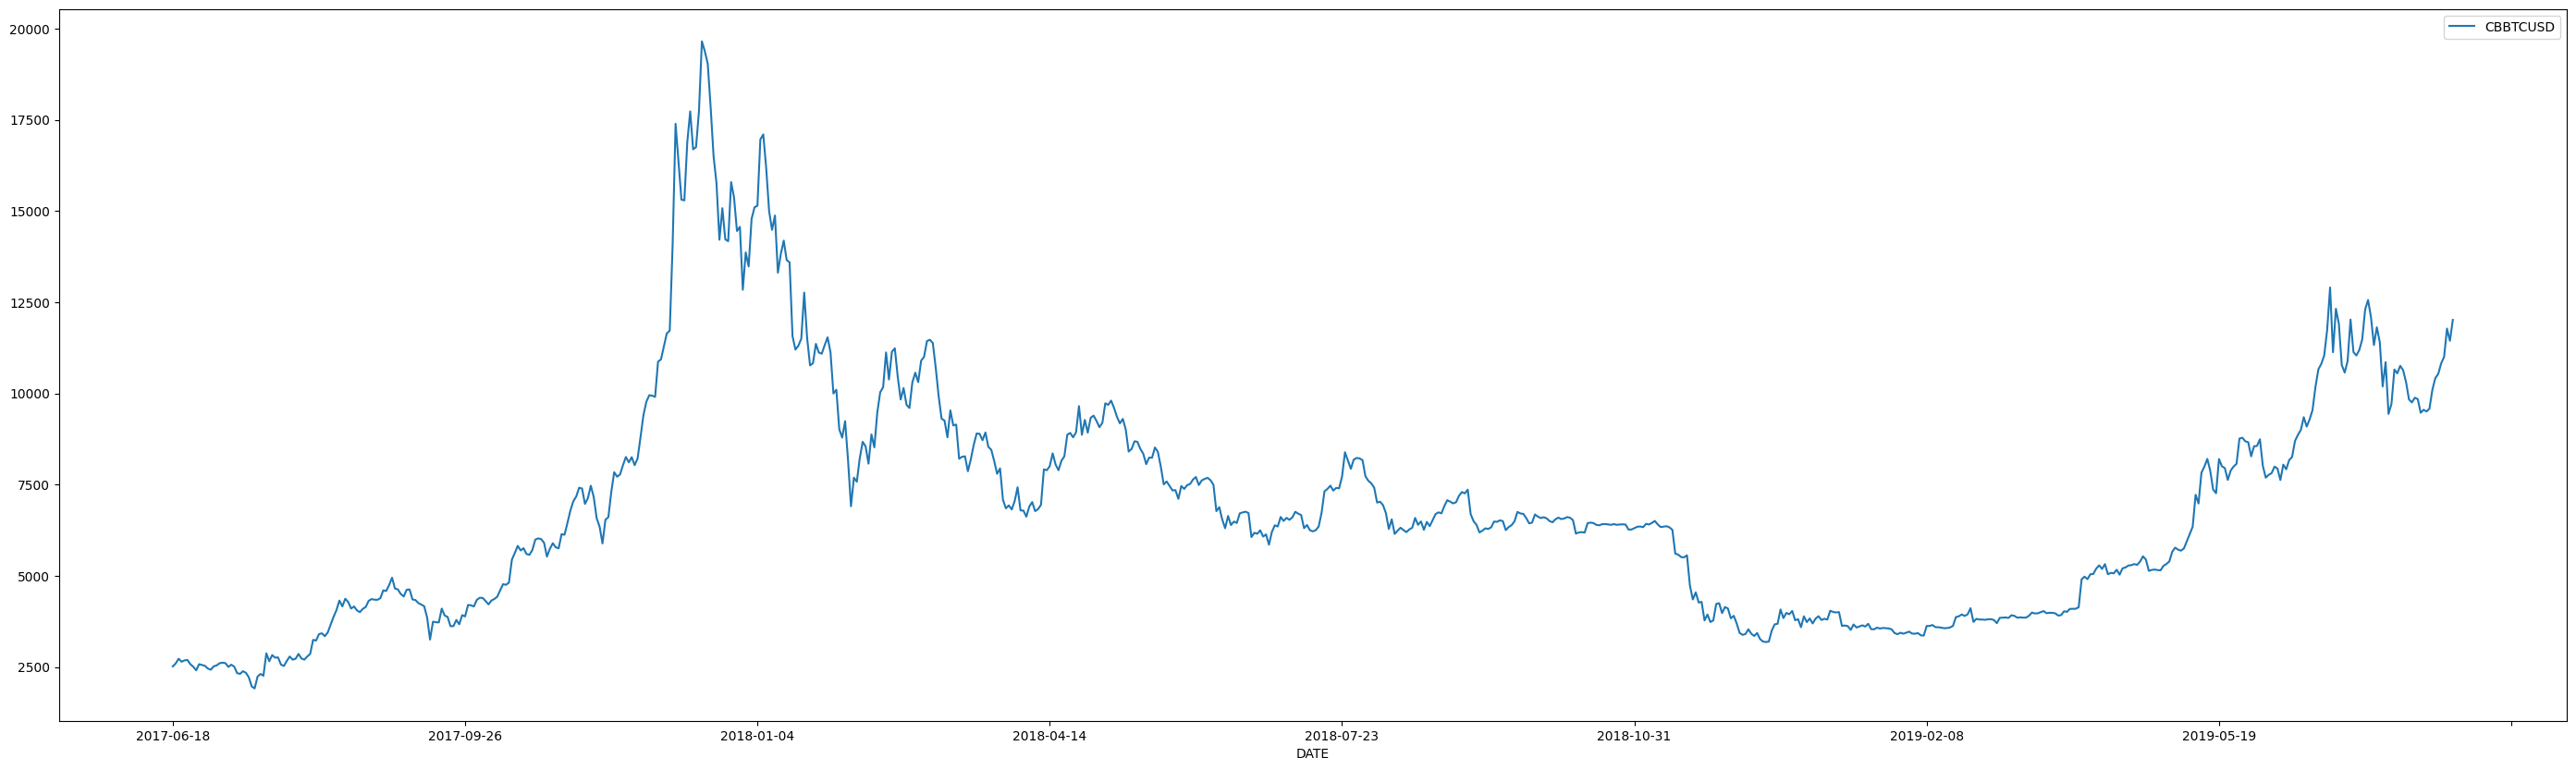

In [18]:
data1.plot(figsize=(35, 10))

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


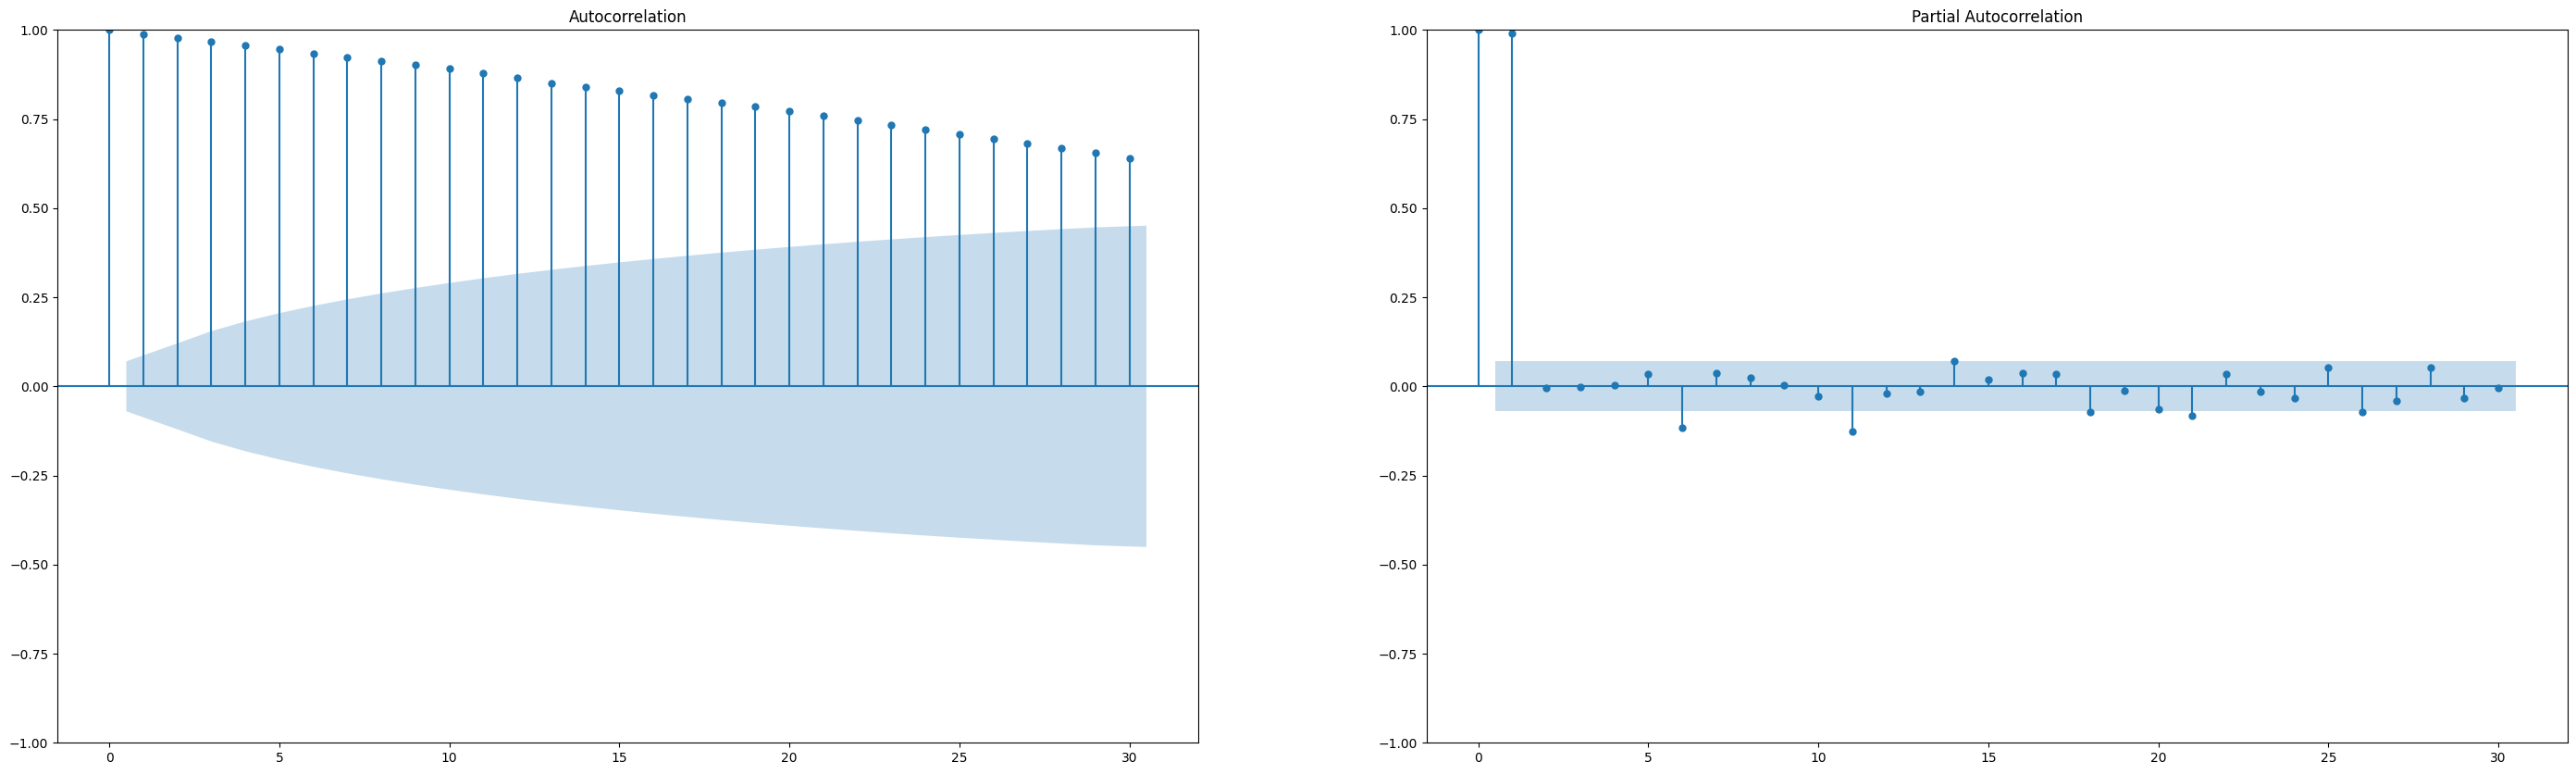

In [19]:
pyplot.figure(figsize = (35, 10))
pyplot.subplot(121)
plot_acf(data1, ax=pyplot.gca(),lags=30)
pyplot.subplot(122)
plot_pacf(data1, ax=pyplot.gca(),lags=30)
pyplot.show()

In [20]:
training_data = data1[:int(0.85*len(data1))]
testing_data = data1[int(0.85*len(data1)):]
print(data1.shape)
print(training_data.shape)
print(testing_data.shape)

(781, 1)
(663, 1)
(118, 1)


In [21]:
model = arch_model(training_data, vol='ARCH')
model_fit = model.fit(disp='off')
print(model_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:               CBBTCUSD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5942.00
Distribution:                  Normal   AIC:                           11890.0
Method:            Maximum Likelihood   BIC:                           11903.5
                                        No. Observations:                  663
Date:                Mon, Apr 03 2023   Df Residuals:                      662
Time:                        20:08:03   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          6362.7920     64.272     98.999      0.000 [6.

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.06e+07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [22]:
forecast = model_fit.forecast(horizon=len(testing_data))
print(forecast)
forecast.variance.values[-1, :].shape

/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


(118,)

In [23]:
preds = np.sqrt(forecast.variance.values[-1, :])
print(len(preds))
preds = pd.DataFrame(preds, index = testing_data.index)

118


<Figure size 640x480 with 0 Axes>

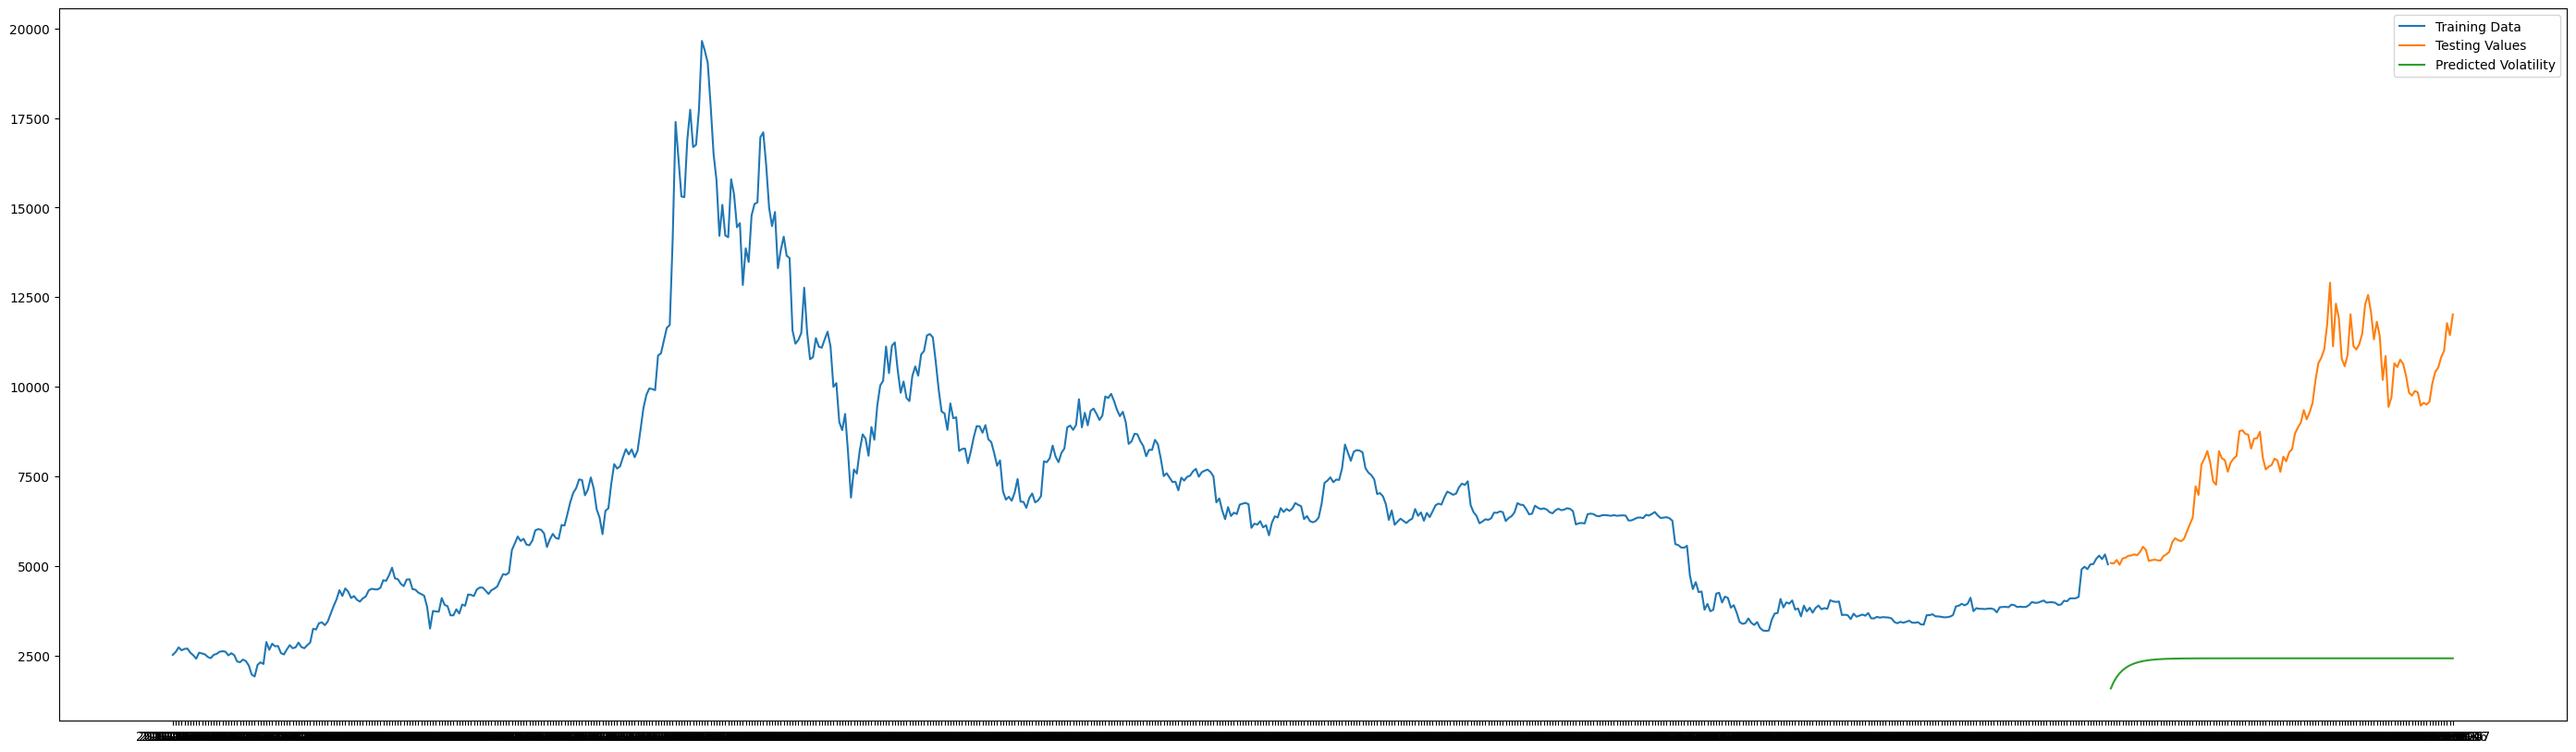

In [25]:
pyplot.figure()
pyplot.figure(figsize=(35, 10))
pyplot.plot(training_data, label='Train')
pyplot.plot(testing_data, label='Valid')
pyplot.plot(preds, label='Prediction')
pyplot.legend(["Training Data", "Testing Values", "Predicted Volatility"])
pyplot.show()